In [1]:
import numpy as np
import torch
from train_glm import train_glm
import matplotlib.pyplot as plt

# Train

In [2]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"

E_neural_file = "Espikes_neural.npy"
I_neural_file = "Ispikes_neural.npy"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy"
C_syn_e_file = "handsub6_C_syn_e.npy"
C_syn_i_file = "handsub6_C_syn_i.npy"
C_den_file = "handsub6_C_den.npy"


E_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)
I_neural = np.load(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)
V = np.load(base_dir+cell_type+"_"+experiment+"/data/"+V_file)[:,:50000].flatten()
C_syn_e = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_e_file)
C_syn_i = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_syn_i_file)
C_den = np.load(base_dir+cell_type+"_"+experiment+"/data/"+C_den_file)

E_neural = torch.from_numpy(E_neural)
I_neural = torch.from_numpy(I_neural)
C_syn_e = torch.from_numpy(C_syn_e)
C_syn_i = torch.from_numpy(C_syn_i)
V = torch.from_numpy(V)
C_den = torch.from_numpy(C_den)

In [3]:
model_type = "alpha"
T_train = 60 * 1000 * 5
T_test = 10 * 1000 * 5
T_no = 500
save_dir = base_dir+cell_type+"_"+experiment+"/"
device = torch.device("cuda")
sparse_no = 4

if model_type == "alpha":
    batch_size = 60000
    iter_no = 10000
    epoch_no = 1
    lr = 0.0025
elif model_type == "alpha_cos":
    batch_size = 2500
    iter_no = 10000
    epoch_no = 5
    #lr = 0.0007
    lr = 0.0025
elif model_type == "alpha_hist":
    batch_size = 4000
    iter_no = 7500
    epoch_no = 1
    lr = 0.0025
elif model_type == "gp":
    batch_size = 60000
    iter_no = 20000
    epoch_no = 5
    lr = 0.1
elif model_type == "gp_hist":
    batch_size = 4000
    iter_no = 10000
    epoch_no = 5
    lr = 0.0005
elif model_type == "alpha_gp_hist":
    batch_size = 4000
    iter_no = 10000
    epoch_no = 5
    lr = 0.0005

In [4]:
train_glm(model_type, V, E_neural, I_neural, T_train, T_test,
                T_no, batch_size, iter_no, epoch_no, C_den, C_syn_e, C_syn_i, 
                sparse_no, device, lr, save_dir)

61


0 0.0038176677974322004
50 0.12537843361960344
100 0.47193908137544527
150 0.558255024025681
200 0.5897140529621876
250 0.6059401939146098
300 0.6236602937116447
350 0.6370177177999576
400 0.6496580157166216
450 0.6640471067616545
500 0.6775689358240033
550 0.6863794041854954
600 0.6959544276450771
650 0.7069555193907494
700 0.7133899276979672
750 0.7265762683532415
800 0.7340743550850792
850 0.741889624523725
900 0.747461062551485
950 0.7577346317808827
1000 0.7628654463509834
1050 0.7682681966344688
1100 0.7771336306570913
1150 0.7808779089137237
1200 0.7871702415062909
1250 0.7920289542058346
1300 0.7983155251956967
1350 0.803230495722341
1400 0.808966069671377
1450 0.8124074649515641
1500 0.8165913855527217
1550 0.8191646482808146
1600 0.8204654406591175
1650 0.8274641587462228
1700 0.8301049908919079
1750 0.8320136207677781
1800 0.8352928843545326
1850 0.8373438812741867
1900 0.8419045318879745
1950 0.845852261797086
2000 0.8475194055530604
2050 0.8504333433656704
2100 0.852772141

In [5]:
output = np.load("/media/hdd01/sklee/"+cell_type+"_"+experiment+"/"+model_type+"_sub6_output.npz")

In [6]:
test = output["test"]
C_syn_e = output["C_syn_e"]
C_syn_i = output["C_syn_i"]
filters = output["filters"]

0.1523986927358778


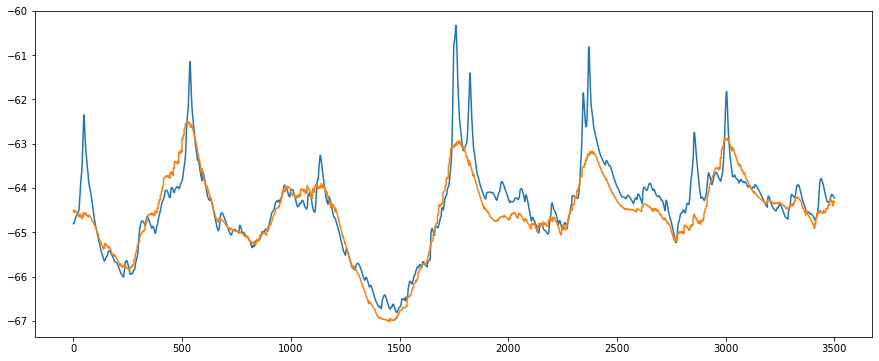

In [16]:
plt.figure(figsize = (15,6))
plt.plot(V[T_train:T_train+T_test][15000:30000][1500:5000])
plt.plot(test[15000:30000][1500:5000])
#plt.plot(V[400000:450000][15000:30000] - test[15000:30000])

print(np.mean((V[T_train:T_train+T_test].cpu().detach().numpy() - test) ** 2))

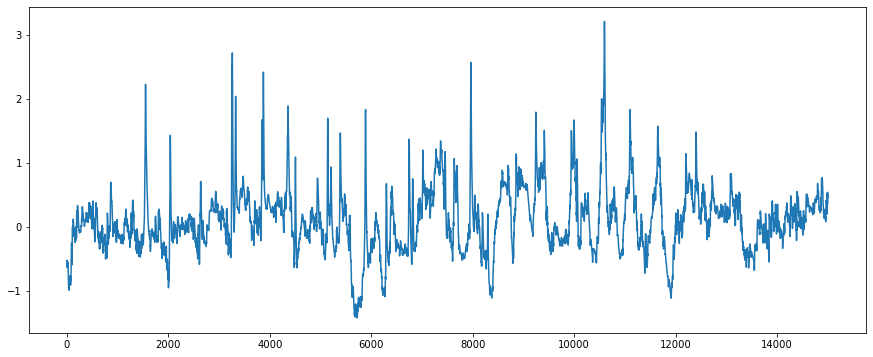

In [14]:
plt.figure(figsize = (15,6))
#plt.plot(V[T_train:T_train+T_test][15000:30000])
#plt.plot(test[15000:30000])
plt.plot(V[T_train:T_train+T_test][15000:30000] - test[15000:30000])

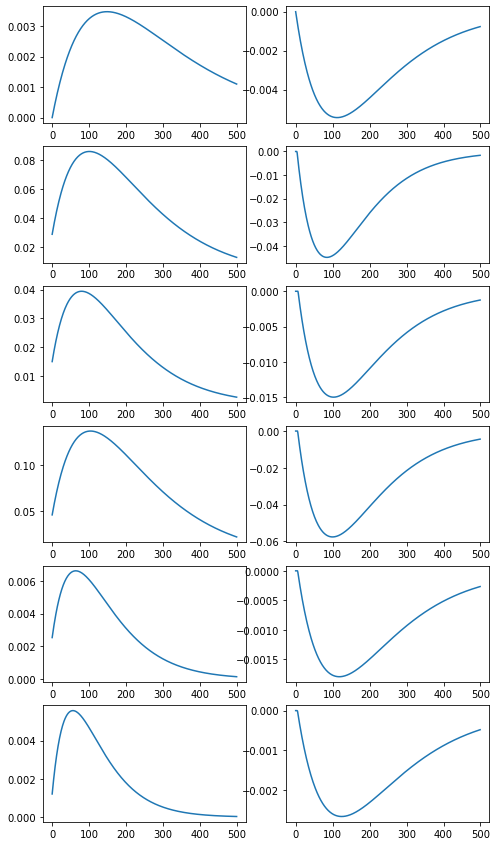

In [8]:
sub_no = 6

fig, axs = plt.subplots(nrows=sub_no, ncols=2, figsize = (8,15))
for i in range(sub_no):
    axs[i,0].plot(filters[i])
    axs[i,1].plot(filters[sub_no+i])
    #axs[i,2].plot(filters[sub_no*2+i])